In [157]:
# These are the necessary libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from numpy import reshape
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [87]:
train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")

In [88]:
print("Before dropping the Id, the train set : {} ".format(train.shape))
print("Before dropping the Id, the test set : {} ".format(test.shape))

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id : {} ".format(train.shape)) 
print("The test data size after dropping Id : {} ".format(test.shape))

Before dropping the Id, the train set : (1460, 81) 
Before dropping the Id, the test set : (1459, 80) 

The train data size after dropping Id : (1460, 80) 
The test data size after dropping Id : (1459, 79) 


The Skewness value is: 1.882876
The Kurtosis value is: 6.536282


/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


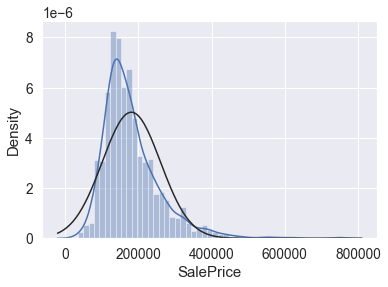

In [89]:
sns.distplot(train['SalePrice'], fit=norm)

print("The Skewness value is: %f" % train['SalePrice'].skew())
print("The Kurtosis value is: %f" % train['SalePrice'].kurt())

In [90]:
# Finding the categorical & numerical variables
categoricalVar = len(train.select_dtypes(include=['object']).columns)
numericalVar = len(train.select_dtypes(include=['int64','float64']).columns)

print('Total number of Features is: ', categoricalVar + numericalVar)
print('Number of Categorical variables : ', categoricalVar)
print('Number of Numerical variables : ', numericalVar)

Total number of Features is:  80
Number of Categorical variables :  43
Number of Numerical variables :  37


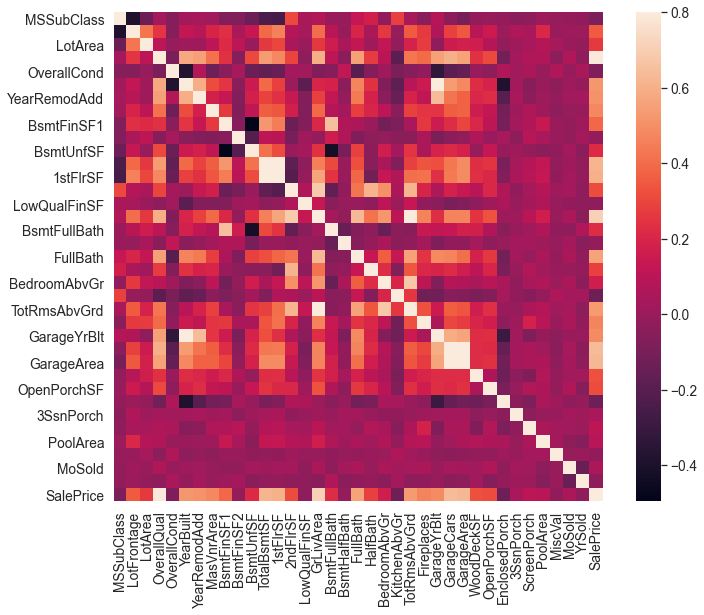

In [91]:
# Find all the features and their correlation with Sale Price
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

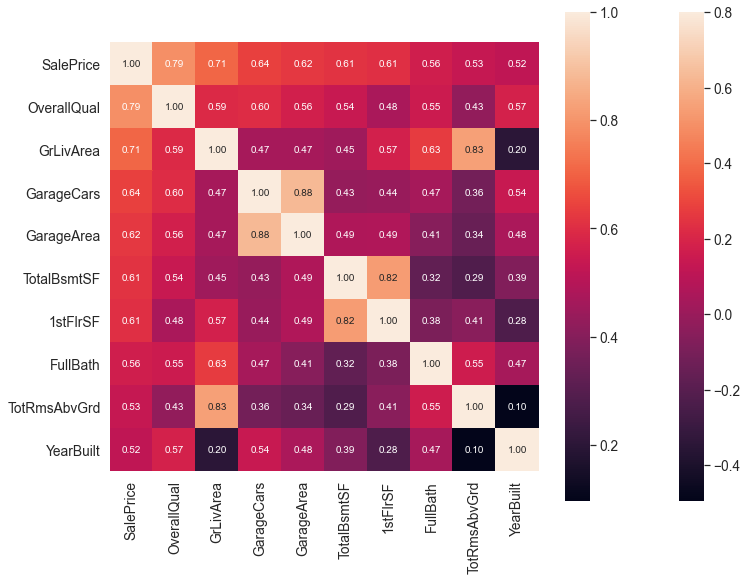

In [92]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Find the top 10 features that have a correlation with Sale Price
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Feature Analysis

### Living Room Area Correlation

In [93]:
trainLivArea = train.drop(train[(train['GrLivArea']>3500) & (train['SalePrice']<800000)].index).reset_index(drop=True)

(0.0, 800000.0)

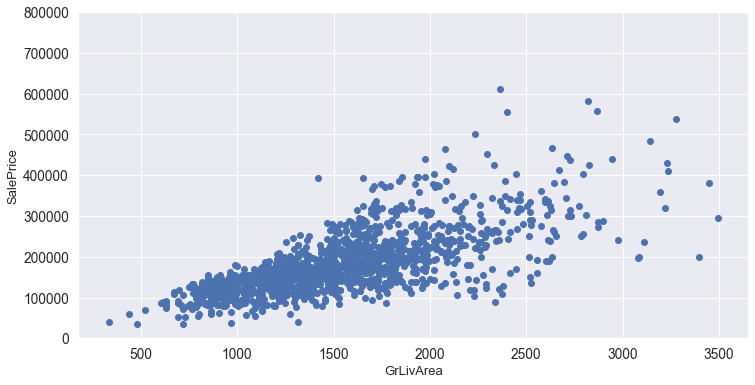

In [94]:
# GrLivArea analysis
plt.figure(figsize=(12,6))
plt.scatter(x=trainLivArea.GrLivArea, y=trainLivArea.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

### Overall Quality Correlation

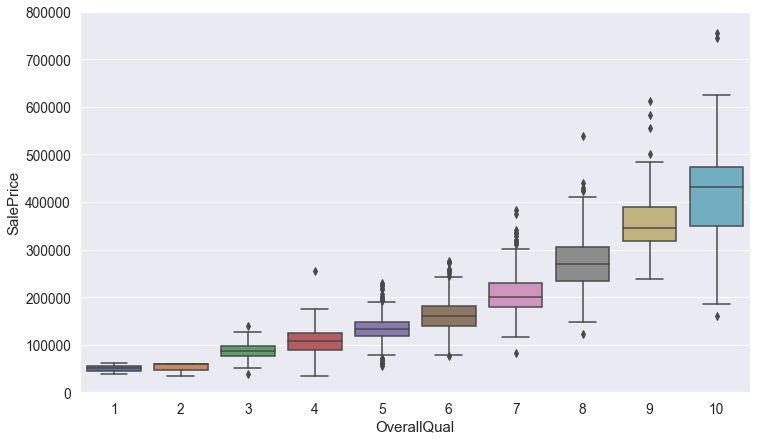

In [95]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Garage Cars Correlation

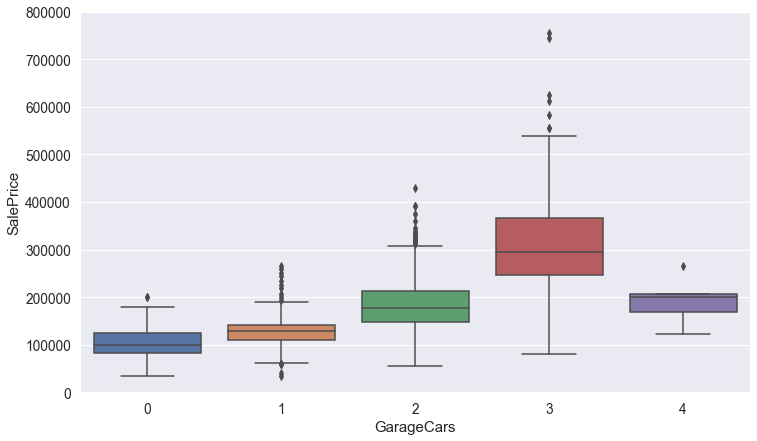

In [96]:
# GarageCars analysis
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Garage Area Correlation

In [97]:
trainGarageArea = train.drop(train[(train['GarageArea']>1000) & (train['SalePrice']<600000)].index).reset_index(drop=True)

(0.0, 800000.0)

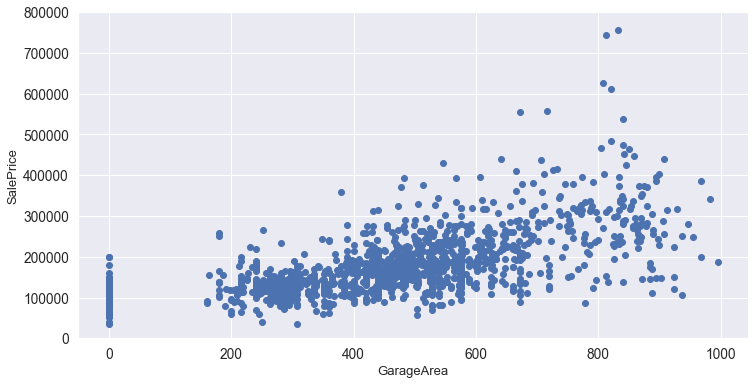

In [98]:
# GarageArea analysis
plt.figure(figsize=(12,6))
plt.scatter(x=trainGarageArea.GarageArea, y=trainGarageArea.SalePrice)
plt.xlabel("GarageArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

### Area of First Floor Correlation

In [99]:
train1stFlr = train.drop(train[(train['1stFlrSF']>2600) & (train['SalePrice']<500000)].index).reset_index(drop=True)

(0.0, 800000.0)

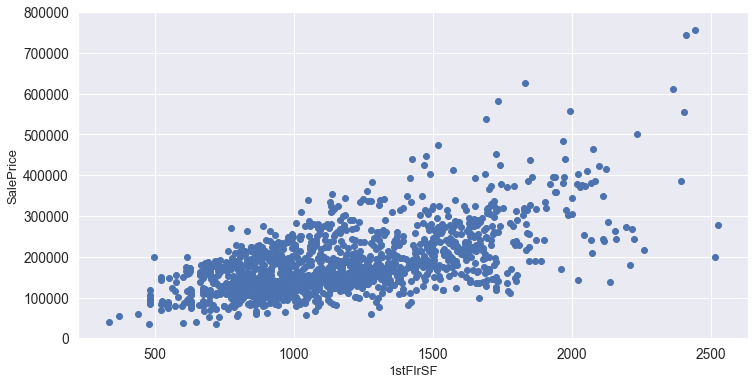

In [100]:
# 1stFlrSF analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train1stFlr['1stFlrSF'], y=train1stFlr.SalePrice)
plt.xlabel("1stFlrSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

### Total Rooms (Above Grade) Correlation

In [101]:
trainTotRms = train.drop(train[(train['TotRmsAbvGrd']>11) & (train['SalePrice']<300000)].index).reset_index(drop=True)

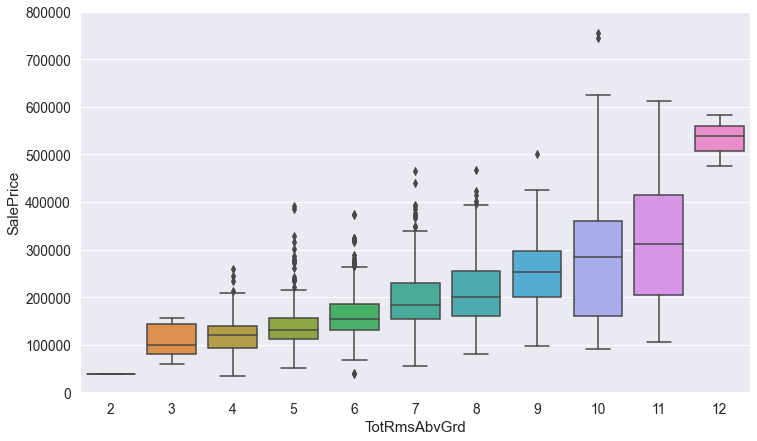

In [102]:
# TotRmsAbvGrd analysis
data = pd.concat([trainTotRms['SalePrice'], trainTotRms['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Year Built Correlation

(0.0, 800000.0)

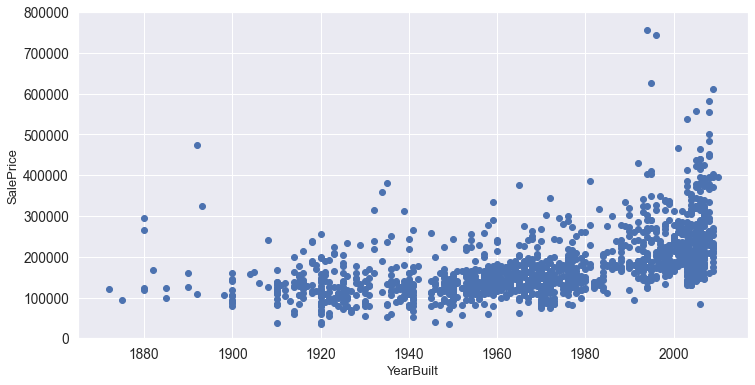

In [103]:
# YearBuilt analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train['YearBuilt'], y=train.SalePrice)
plt.xlabel("YearBuilt", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

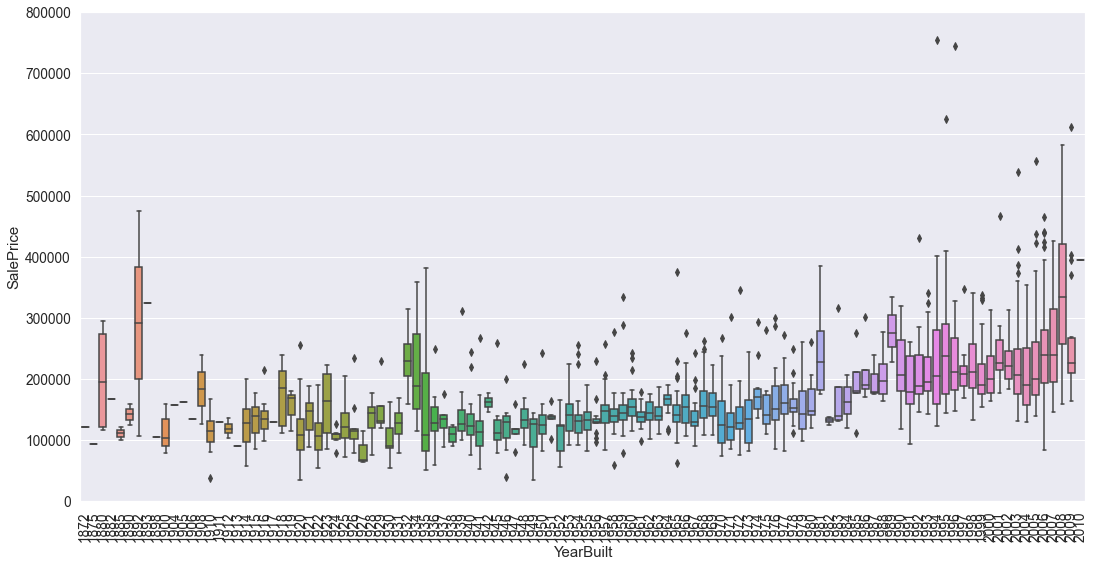

In [104]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(18, 9))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Total Basement Square Feet Correlation

In [105]:
trainTotalBsmt = train.drop(train[(train['TotalBsmtSF']>2500) & (train['SalePrice']<600000)].index).reset_index(drop=True)

(0.0, 800000.0)

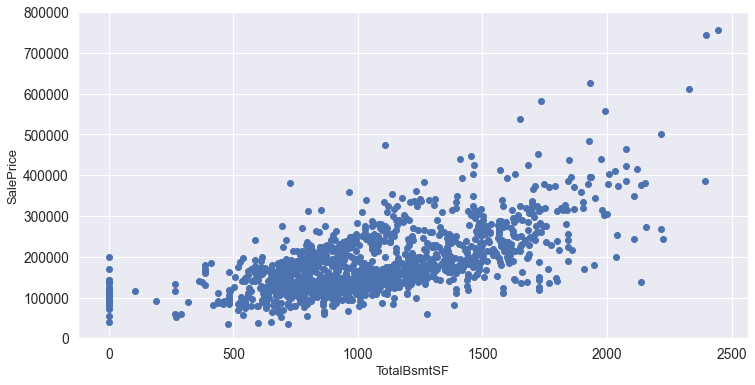

In [106]:
# TotalBsmtSF analysis
plt.figure(figsize=(12,6))
plt.scatter(x=trainTotalBsmt.TotalBsmtSF, y=trainTotalBsmt.SalePrice)
plt.xlabel("TotalBsmtSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

# Clean up the Data

### Remove Null Data

In [107]:
size_of_train = train.shape[0]
size_of_test = test.shape[0]
sale_price_train = train.SalePrice.values
total_data = pd.concat((train, test)).reset_index(drop=True)
total_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(total_data.shape))

Train data size is : (1460, 80)
Test data size is : (1459, 79)
Combined dataset size is : (2919, 79)


Text(0.5, 1.0, 'Percent missing data by feature')

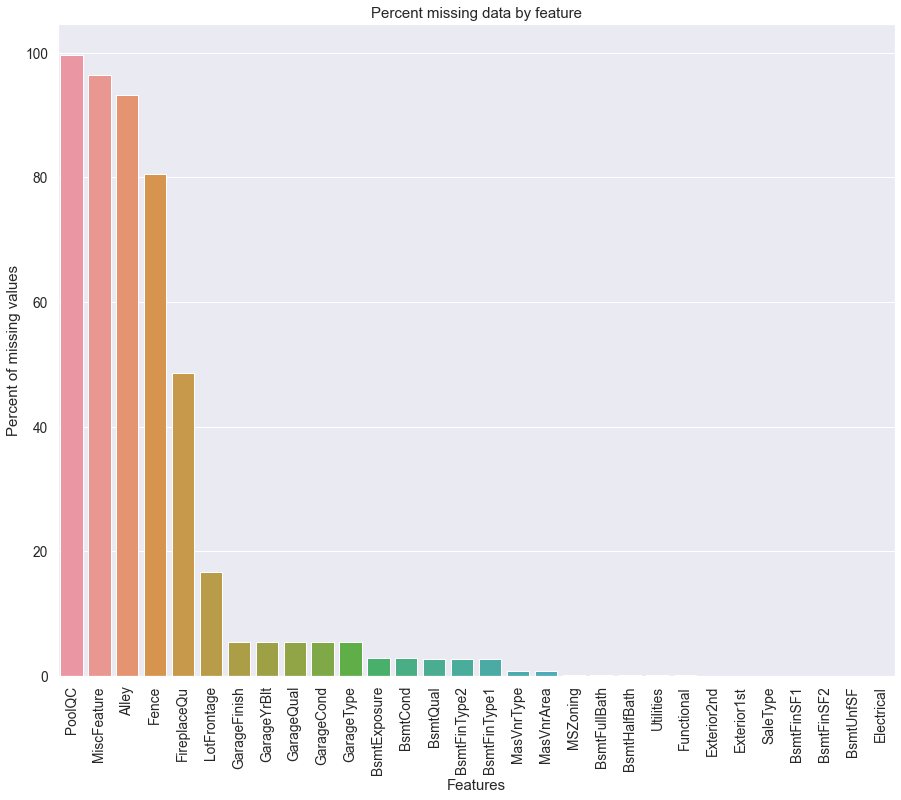

In [108]:
all_data_na = (total_data.isnull().sum() / len(total_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [109]:
total_data["PoolQC"] = total_data["PoolQC"].fillna("None")
total_data["MiscFeature"] = total_data["MiscFeature"].fillna("None")
total_data["Alley"] = total_data["Alley"].fillna("None")
total_data["Fence"] = total_data["Fence"].fillna("None")
total_data["FireplaceQu"] = total_data["FireplaceQu"].fillna("None")
total_data["LotFrontage"] = total_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total_data[col] = total_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total_data[col] = total_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total_data[col] = total_data[col].fillna('None')
total_data["MasVnrType"] = total_data["MasVnrType"].fillna("None")
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna(0)
total_data['MSZoning'] = total_data['MSZoning'].fillna(total_data['MSZoning'].mode()[0])
total_data = total_data.drop(['Utilities'], axis=1)
total_data["Functional"] = total_data["Functional"].fillna("Typ")
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode()[0])
total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode()[0])
total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])
total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])
total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])
total_data['MSSubClass'] = total_data['MSSubClass'].fillna("None")


In [110]:
all_data_na = (total_data.isnull().sum() / len(total_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Feature Engineering

In [111]:
total_data['MSSubClass'] = total_data['MSSubClass'].apply(str)
total_data['OverallCond'] = total_data['OverallCond'].astype(str)
total_data['YrSold'] = total_data['YrSold'].astype(str)
total_data['MoSold'] = total_data['MoSold'].astype(str)

In [112]:
total_data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [113]:
from sklearn.preprocessing import LabelEncoder
cols = ('ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(total_data[c].values)) 
    total_data[c] = lbl.transform(list(total_data[c].values))
    
print('Shape total_data: {}'.format(total_data.shape))

Shape total_data: (2919, 78)


In [114]:
total_data['TotalSF'] = total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF']

### Normalize Skewed Data

##### Applying log(x + 1) to all the columns using the numpy function log1p


 mu = 12.02 and sigma = 0.40



/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


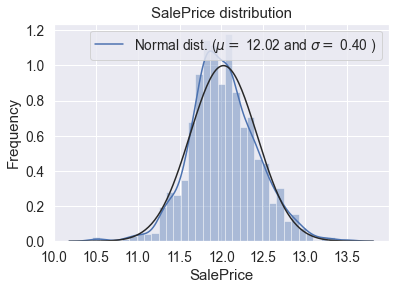

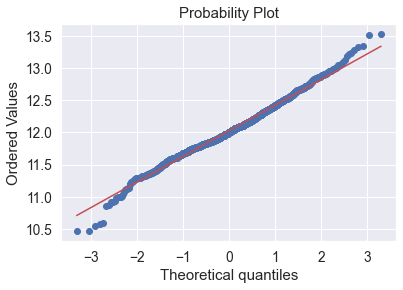

Skewness: 0.121347
Kurtosis: 0.809519


In [115]:
from scipy import stats

train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

train_sale_price = train.SalePrice.values

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [116]:
numeric_feats = total_data.dtypes[total_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = total_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065


In [117]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    total_data[feat] = boxcox1p(total_data[feat], lam)
    total_data[feat] += 1

There are 59 skewed numerical features to Box Cox transform


In [118]:
total_data = pd.get_dummies(total_data)
print(total_data.shape)

(2919, 221)


In [119]:
combined_train = total_data[:1460]
kaggleset = total_data[1460:]

### Prediction Model

In [120]:
X_train, X_test, y_train, y_test = train_test_split(combined_train, train_sale_price, test_size=0.2)

In [121]:
X_train.shape

(1168, 221)

In [122]:
y_test.shape

(292,)

In [123]:
X_test.shape

(292, 221)

In [124]:
y_train.shape

(1168,)

In [125]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [126]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

model_scores = {}

In [127]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['lightgbm'] = (score.mean(), score.std())

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] baggi

In [128]:
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['xgb'] = (score.mean(), score.std())

[12:14:30] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:15:02] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:15:03] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:15:35] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:15:35] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is no

In [136]:
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['ridge'] = (score.mean(), score.std())

/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.41938e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.59601e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.96407e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.99595e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/lin

/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.16759e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.01436e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46641e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11542e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/lin

/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.7819e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.51858e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40434e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.75938e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.90046e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.25589e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.41219e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.7506e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/sharanyaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

ridge: 0.1184 (0.0230)


In [141]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['rf'] = (score.mean(), score.std())

rf: 0.1430 (0.0141)


In [143]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['gbr'] = (score.mean(), score.std())

gbr: 0.1176 (0.0228)


In [146]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['svr'] = (score.mean(), score.std())

SVR: 0.1183 (0.0260)


In [152]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = cv_rmse(ENet)
print("ElasticNet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['ElasticNet'] = (score.mean(), score.std())

ElasticNet: 0.1161 (0.0232)


In [158]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

score = cv_rmse(lasso)
print("Lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
model_scores['lasso'] = (score.mean(), score.std())

Lasso: 0.1162 (0.0232)


In [159]:
model_scores

{'lightgbm': (0.1211610112203509, 0.02115914846750307),
 'xgb': (0.14219630104728545, 0.014321041455924152),
 'ridge': (0.11837963084479458, 0.023015789239087505),
 'rf': (0.1429560840747342, 0.014116595078216896),
 'gbr': (0.11761447431801626, 0.022774808856548194),
 'svr': (0.11831147362389266, 0.02599157730778503),
 'ElasticNet': (0.11614275736377543, 0.023167900984166163),
 'lasso': (0.1162044891456383, 0.023156452131361714)}

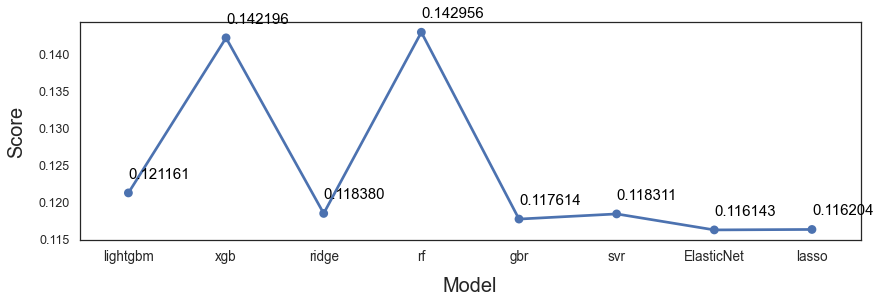

In [177]:
fig = plt.figure(figsize=(14, 4))

ax = sns.pointplot(x=list(model_scores.keys()), y=[score for score, _ in model_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(model_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), color='black')

plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.show()

In [178]:
submission = pd.read_csv("./house-prices-advanced-regression-techniques/sample_submission.csv")
submission.shape

(1459, 2)

In [191]:
lasso.fit(X_train.values, y_train)
train_pred = lasso.predict(X_train.values)
lasso_pred = np.expm1(lasso.predict(X_test.values))

In [192]:
lasso_pred

array([ 124463.43233193,  133117.82158162,   83509.8002285 ,
        302776.22963324,   70800.40327052,  163089.30103235,
        356704.8705666 ,  164068.97321302,  179797.30406824,
        136130.81287226,  132119.23514544,  118252.65980371,
        106861.33373664,  113263.25781411,  179747.53164898,
        100225.9771564 ,  217009.21309983,  187002.99777161,
        195685.69081392,  190361.10500667,  131578.8796241 ,
        186004.48789633, 1017655.85853249,  270673.67501663,
        217407.30050517,  292562.78864692,  165102.43675215,
        226190.11245455,  143123.41680085,  356825.59541174,
        178361.23032513,  154162.06190764,   94807.41208847,
        282071.89468882,  119866.94700043,  178016.70163413,
        250422.66444876,  166173.13154907,  209826.29358205,
        148757.98803777,  133315.0346644 ,  119756.97995457,
        122529.4612135 ,  391606.80093793,  200278.31026448,
         92081.50160837,   81839.19484334,  240181.30465106,
        202068.13710936,

In [193]:
submission_final = pd.DataFrame()
submission_final['SalePrice'] = lasso_pred
submission_final.to_csv('submission.csv',index=False)